<a href="https://colab.research.google.com/github/xiao-yucheng0625/ML-Progression-Journal/blob/main/Energy_efficiency_of_buildings_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. About dataset
We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes.

The dataset comprises 768 samples and 8 features(X1...X8), aiming to predict two real valued responses(Y1 and Y2). It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset

# 2. Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 3. Understanding the data

## 3.1  Reading the dataset with Pandas

In [ ]:
data = pd.read_csv(r"請輸入該資料集", encoding="latin1")
data.head() # 前五筆數據

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


The dataset consists of 768 rows and 10 columns.

In [ ]:
data.shape

(768, 10)

## 3.2 Renaming colunms to more informative names

In [ ]:
columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation',
                'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']
data.columns = columns

確認資料型態以及是否有缺失值，如果有缺失值的話可以補上中位數。

從下方可以看出 orientation 以及 glazing_area_distribution 為整數型態，因此可以視為類別。

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


# 4. Explorary Data Analysis(EDA)

## 4.1 觀察各變數間的相關性

從下圖可以看出有三個特徵與兩個目標變數的相關性非常小，分別是 orientation、glazing_area、glazing_area_distribution。

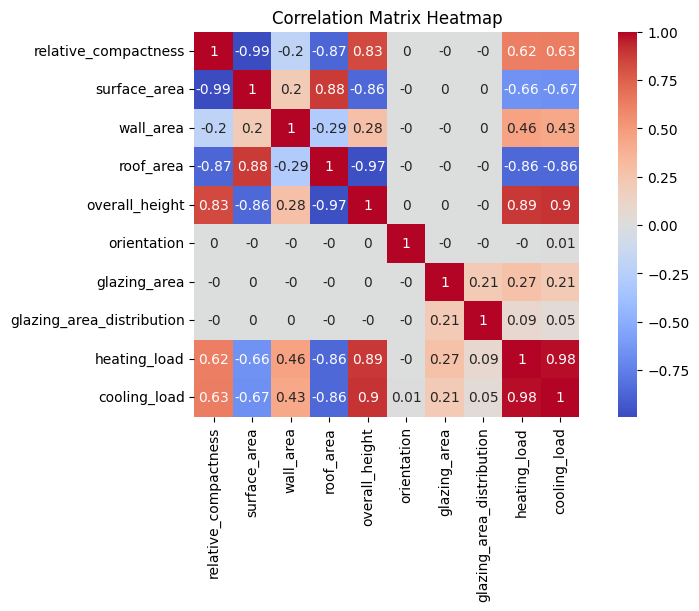

In [ ]:
correlation_matrix = data.corr().round(2)

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

用成對散布圖再觀察一次

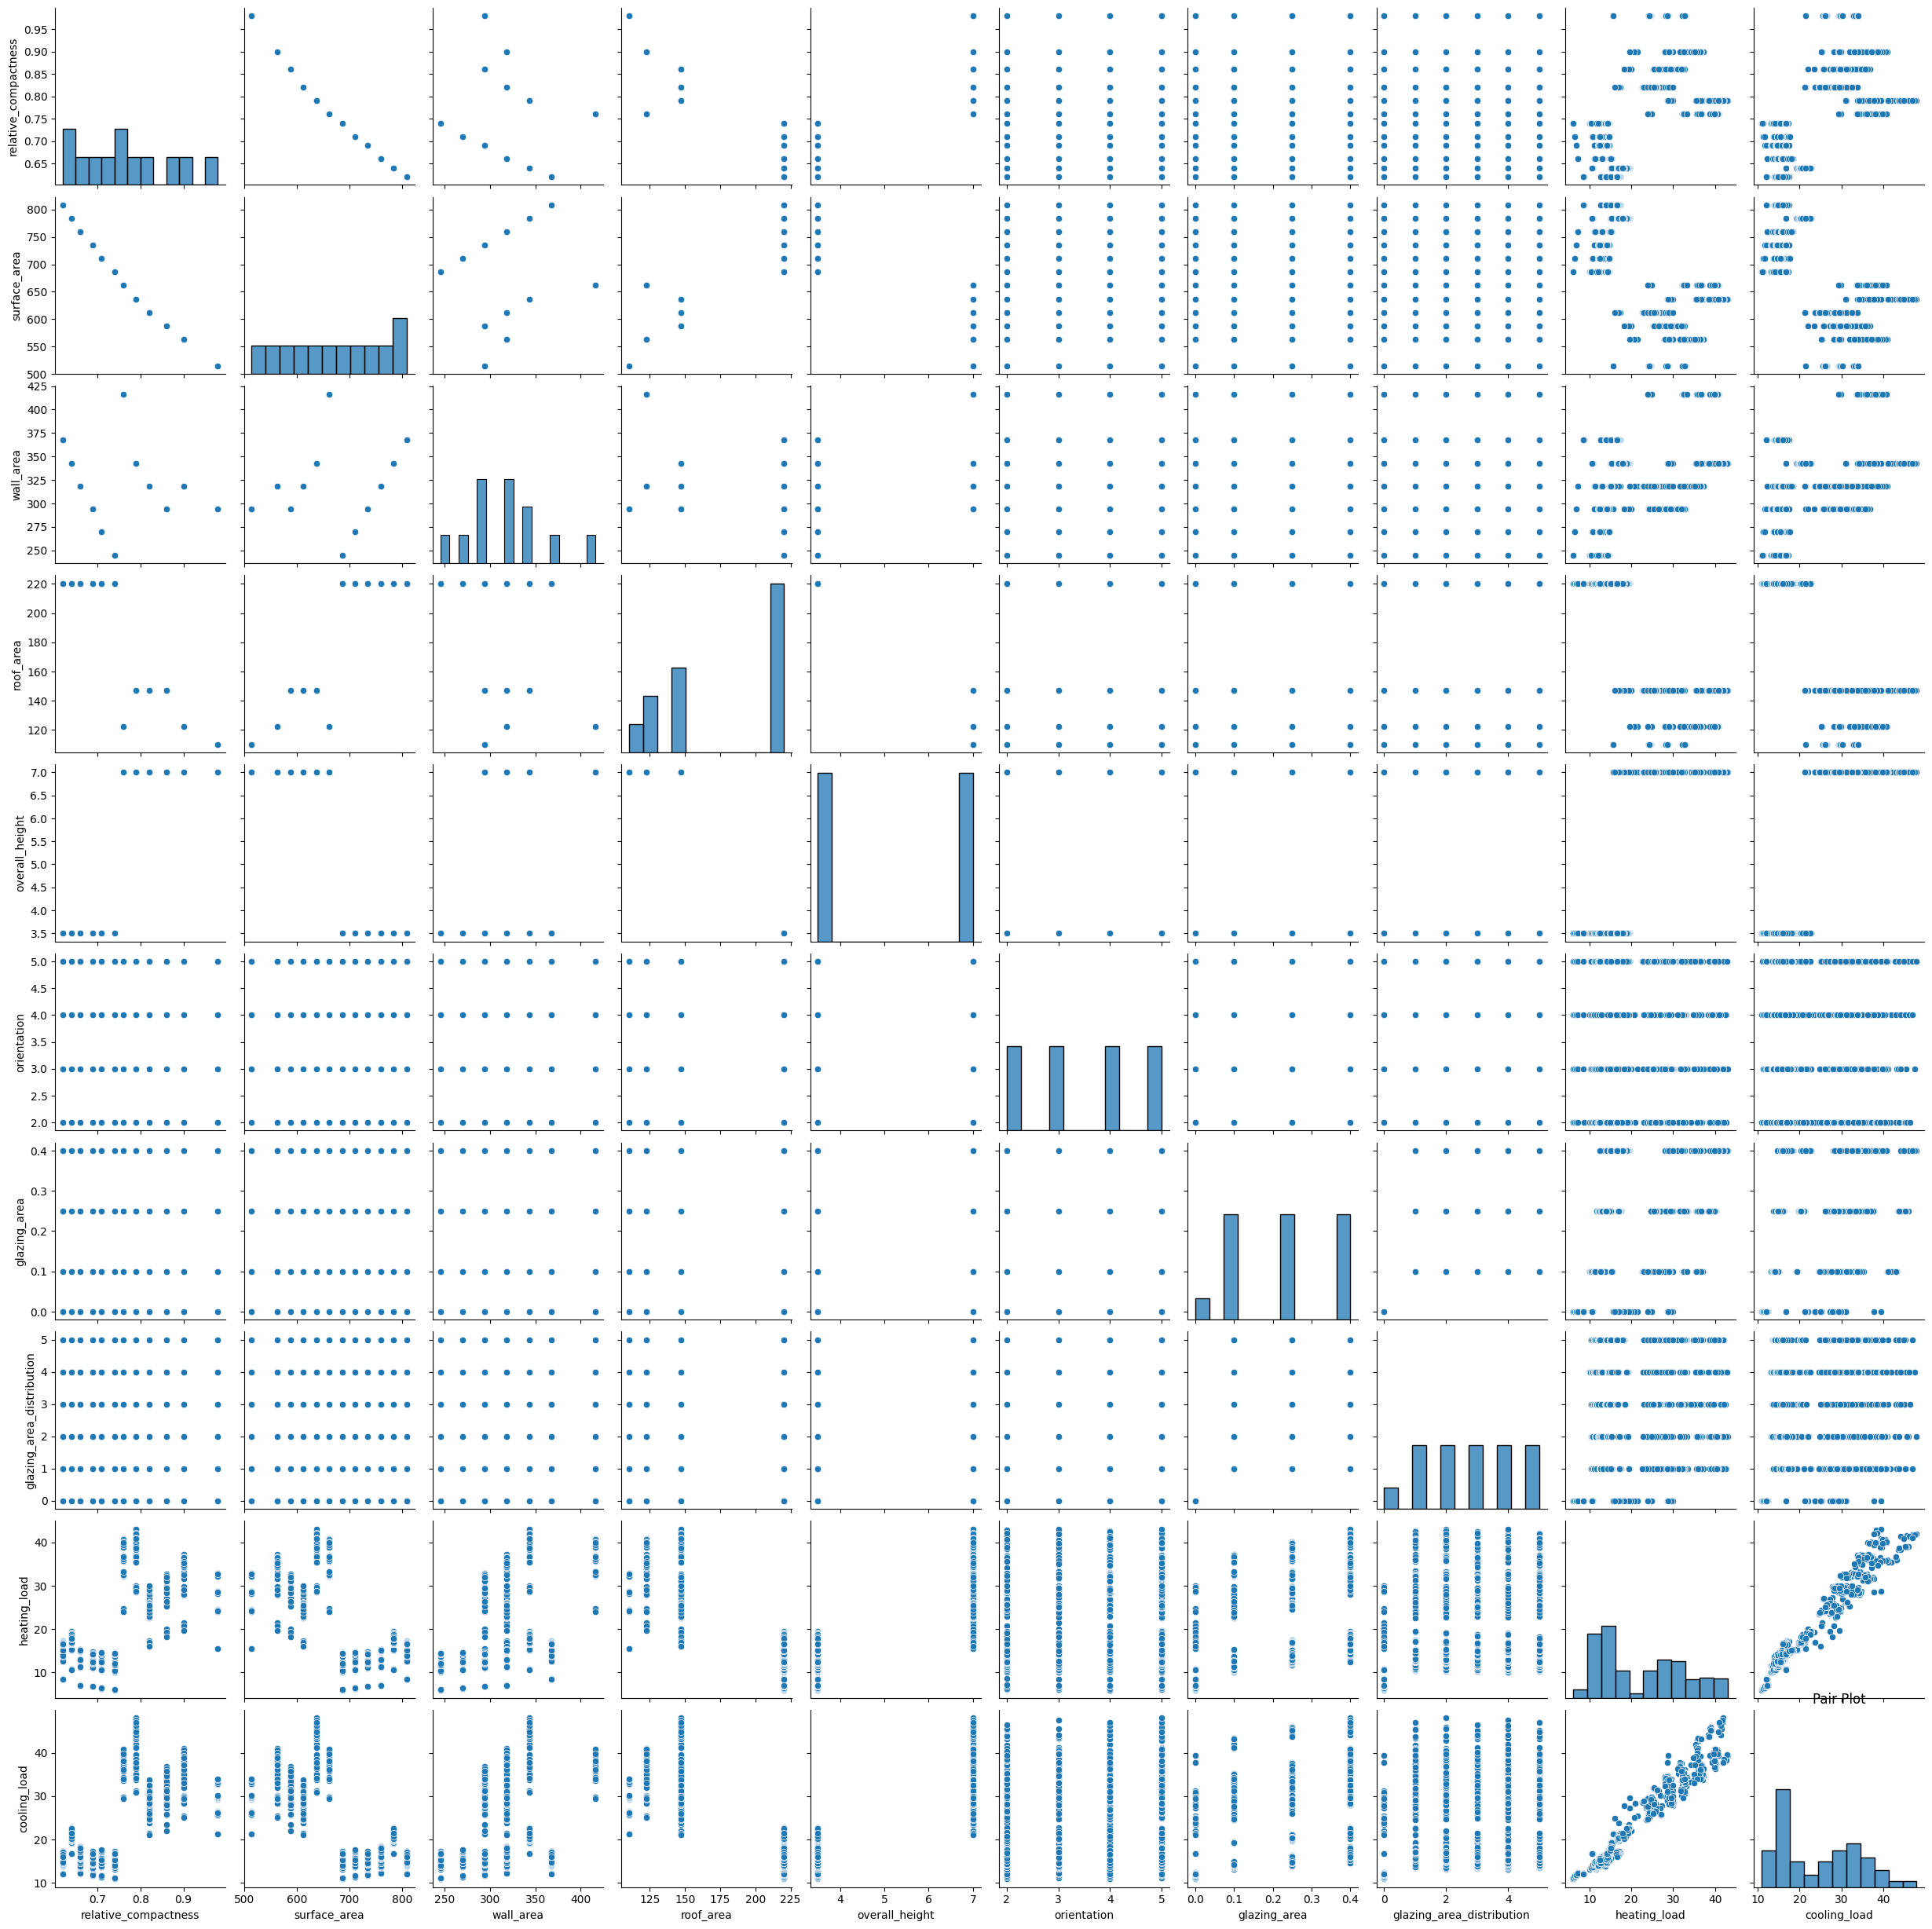

In [ ]:
sns.pairplot(data)
plt.title('Pair Plot')
plt.show()

## 4.2 確認 orientation 對於 hetaing_load/cooling_load 的影響

orientation 的改變幾乎不會影響 hetaing_load/cooling_load 的數值。

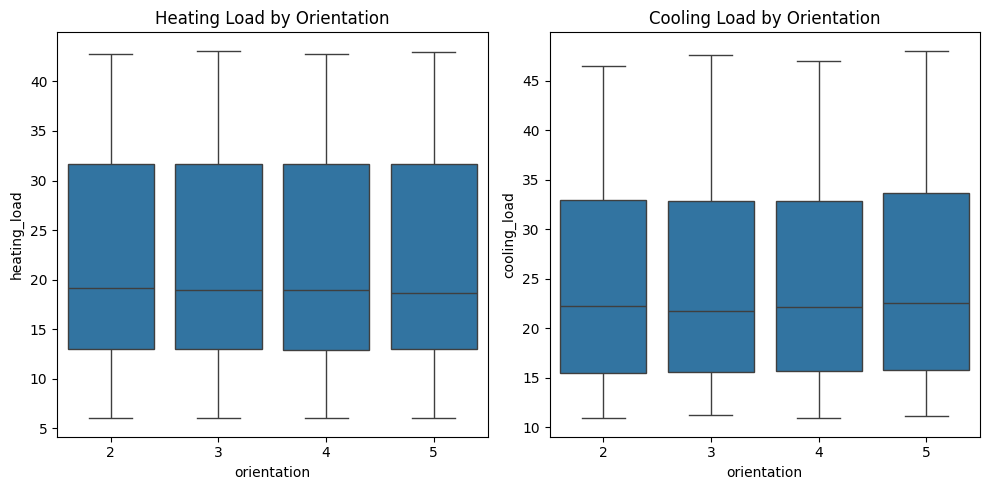

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# check whether orientation has an impact on heating_load
sns.boxplot(data=data, x='orientation', y='heating_load', ax=axes[0])
axes[0].set_title('Heating Load by Orientation')

# check whether orientation has an impact on cooling_load
sns.boxplot(data=data, x='orientation', y='cooling_load', ax=axes[1])
axes[1].set_title('Cooling Load by Orientation')

plt.tight_layout()
plt.show()

## 4.3 確認 glazing_area_distribution 對於 hetaing_load/cooling_load 的影響

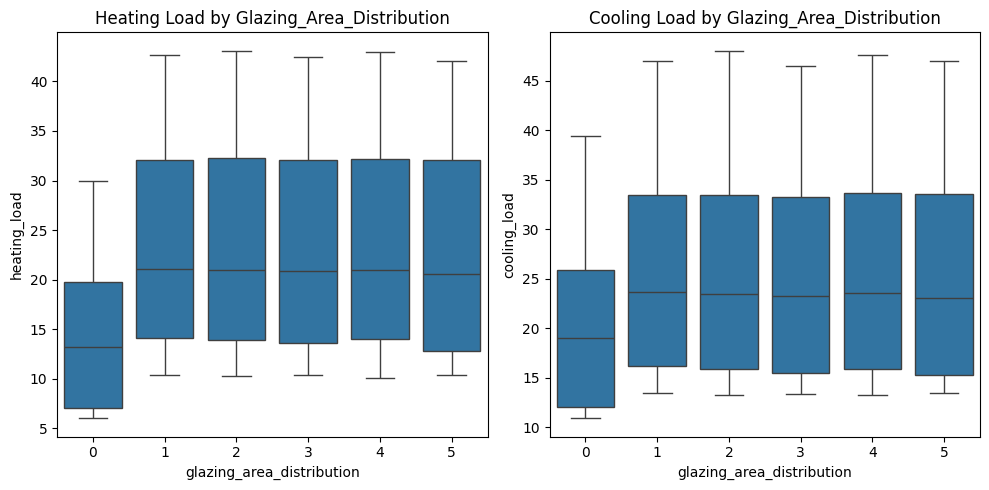

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# check whether glazing_area_distribution has an impact on heating_load
sns.boxplot(data=data, x='glazing_area_distribution', y='heating_load', ax=axes[0])
axes[0].set_title('Heating Load by Glazing_Area_Distribution')

# check whether glazing_area_distribution has an impact on cooling_load
sns.boxplot(data=data, x='glazing_area_distribution', y='cooling_load', ax=axes[1])
axes[1].set_title('Cooling Load by Glazing_Area_Distribution')

plt.tight_layout()
plt.show()

只有 0 與 1-5 的數值有明顯差異，因此將 glazing_area_distribution 從 0-5 轉換為雙變量（0 跟 1）。

## 4.4 Reducing dimentsions

首先，在原始資料集中，orientation 與目標變數無關，因此可以捨棄。

In [ ]:
data = data.drop('orientation', axis=1)

再來，從 correlation_matrix 以及 pairplot 中發現，relative_compactness 和 surfeace_area 具有高度負相關，因此可以考慮刪除來降維，降低 collinearity 的風險。

丟掉 surface_area 這個變數

In [ ]:
data.drop(['surface_area'], axis=1, inplace=True)

# 5. Data modeling

## 5.1 了解輸入變數以及目標變數

In [ ]:
Y1 = data['heating_load']
Y2 = data['cooling_load']
X = data.drop(['heating_load','cooling_load'], axis = 1)

# check features
features = list(X.columns)
features

['relative_compactness',
 'wall_area',
 'roof_area',
 'overall_height',
 'glazing_area',
 'glazing_area_distribution']

## 5.2 Linear regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
seed = 1

## 5.3 將資料拆分成訓練集與測試集

In [ ]:
X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size = 0.30, random_state=seed)
X_train, X_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size = 0.30, random_state=seed)

對 X 做標準化處理

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

打造 Linear regression model

In [ ]:
lr_heating = LinearRegression()
lr_heating.fit(X_train_scaled, Y1_train)

lr_cooling = LinearRegression()
lr_cooling.fit(X_train_scaled, Y2_train)

LinearRegression()

In [ ]:
Y1_pred = lr_heating.predict(X_test_scaled)
Y1_pred

array([13.14529945, 27.49096701, 33.46952218, 32.57164716, 34.10502321,
       15.29879713, 12.30951954, 28.39732498, 15.15601573, 26.24848564,
       17.87596216, 30.4802446 , 31.74664902, 17.24046113, 13.00251805,
       32.57164716, 27.1658505 , 17.66412849, 15.71090968, 33.73506753,
       31.95848269,  8.5642961 , 28.54553776, 18.07624104, 13.90735024,
       33.68135586, 18.48835359, 12.93346577, 35.77275842, 16.00335044,
       31.17476889, 33.25768851, 11.26190596, 16.62729667, 26.88398667,
       35.9845921 , 18.49990839, 11.05007229, 32.78348084, 15.15601573,
       36.51251144, 11.89740699, 10.09327934, 12.09768587, 10.43690782,
       11.67401851, 24.04380024, 31.53481534, 33.89318954, 32.78348084,
        9.80140679, 30.69207827,  9.60112792, 15.28724233, 34.31225925,
       34.52409293, 33.25768851, 29.23776323, 11.55357368, 17.02862746,
       13.14529945, 28.1218704 , 28.33370408, 34.31225925, 27.1658505 ,
       40.34912373, 31.32298167, 17.87596216, 30.90391195, 14.88

In [ ]:
Y2_pred = lr_cooling.predict(X_test_scaled)
Y2_pred

array([15.46079617, 30.01363678, 34.47386432, 34.54177695, 34.65208027,
       17.33202371, 15.10190994, 29.89310964, 17.74461708, 29.43071089,
       19.32206188, 32.24375055, 33.62024495, 19.14384593, 15.87338954,
       34.54177695, 30.70611003, 19.26265657, 17.57209931, 35.65673072,
       33.67965027, 12.42226286, 31.33072587, 19.50273216, 16.70427445,
       34.53326964, 19.74280776, 15.40139085, 36.83129603, 17.98223834,
       32.06381809, 34.414459  , 14.6836184 , 18.28171926, 29.60892684,
       36.89070135, 19.62154279, 14.62421308, 34.60118226, 17.74461708,
       37.82743917, 14.86183434, 13.67702707, 15.04250462, 13.7620864 ,
       14.92369399, 27.88456306, 33.56083964, 34.59267495, 34.60118226,
       13.58387045, 32.30315587, 13.40320017, 17.45328867, 35.73154809,
       35.79095341, 34.414459  , 31.66082466, 14.65237663, 19.08444062,
       15.46079617, 31.21191523, 31.27132055, 35.73154809, 30.70611003,
       40.29517421, 33.50143432, 19.32206188, 32.36256118, 17.09

## 5.4 模型評估

線性模型（lr），這裡採用三種評估指標，分別是 adjusted R2、MSE、RMSE、MAE。

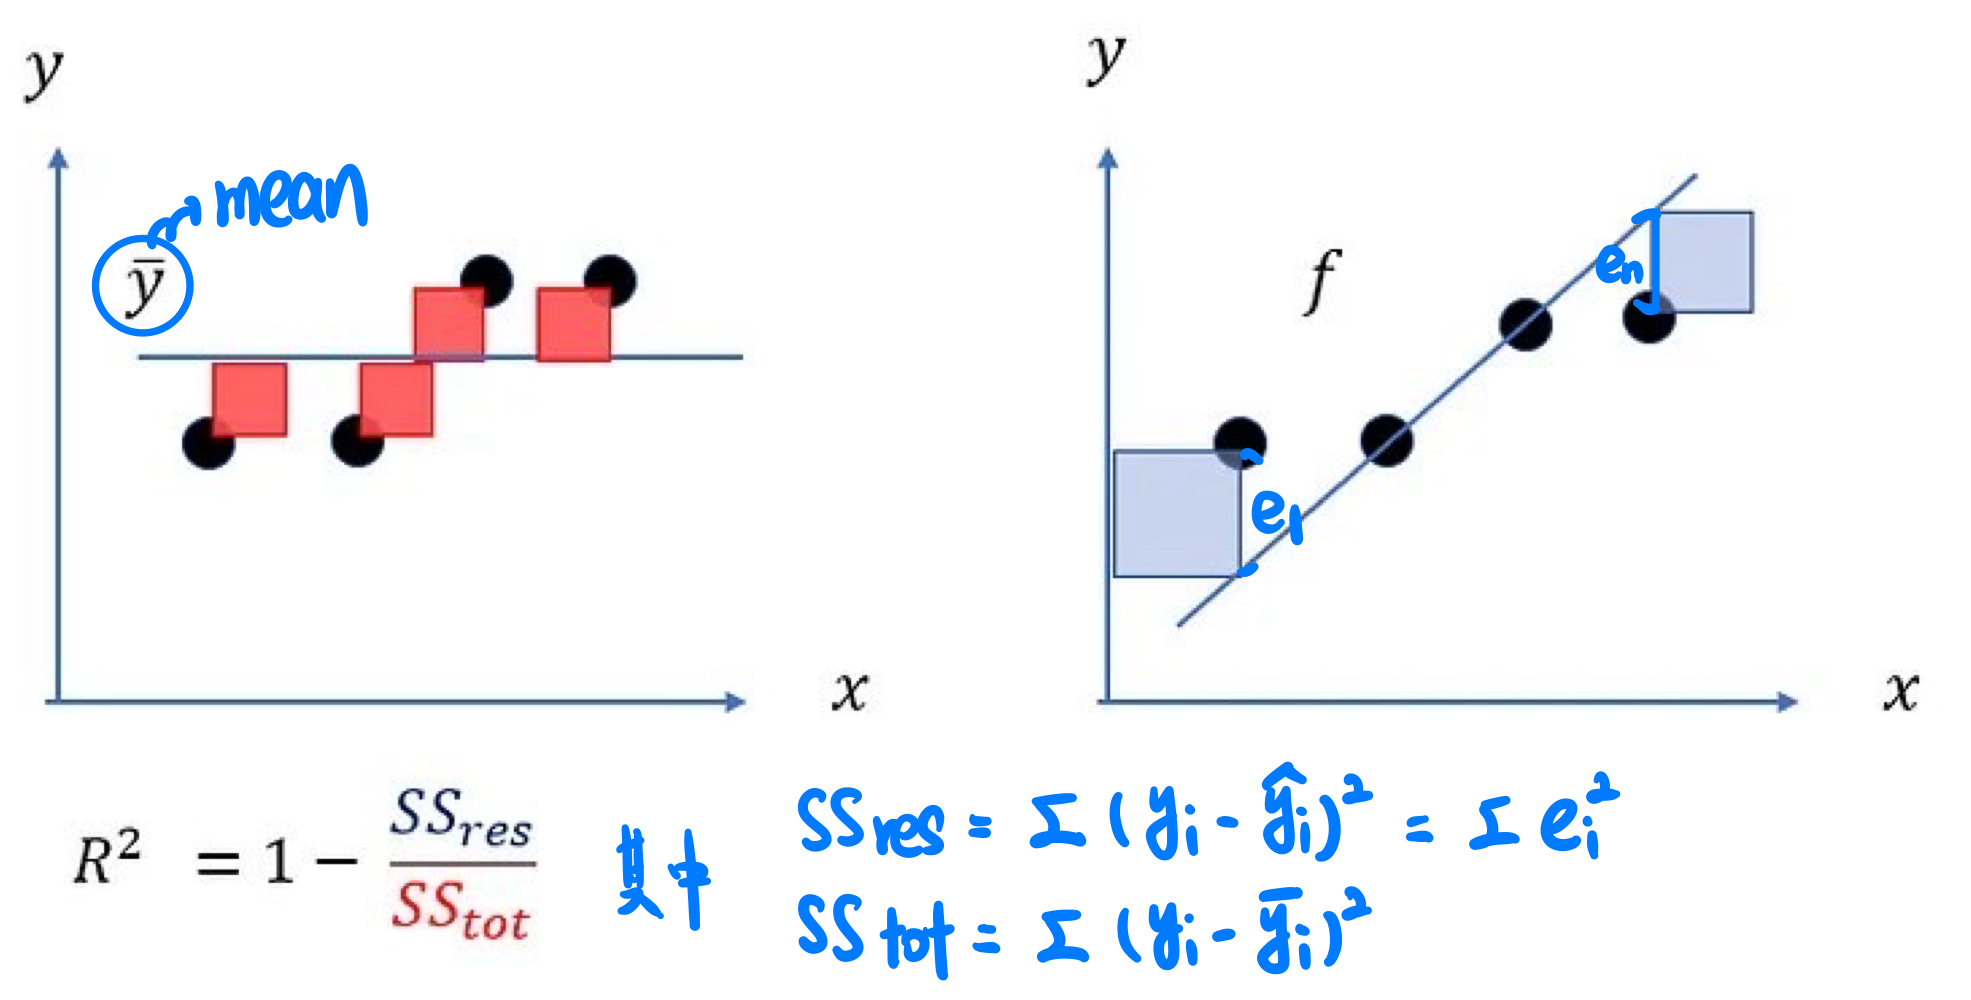

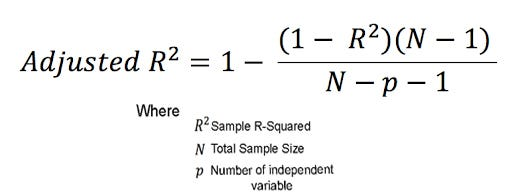

In [ ]:
adjusted_r2_heating = 1 - (1-r2_score(Y1_test, Y1_pred))*(len(Y1_test)-1)/(len(Y1_test)-X_test.shape[1]-1)
adjusted_r2_cooling = 1 - (1-r2_score(Y2_test, Y2_pred))*(len(Y2_test)-1)/(len(Y2_test)-X_test.shape[1]-1)
print('Heating load model adjusted R² score:', round(adjusted_r2_heating, 4))
print('Cooling load model adjusted R² score:', round(adjusted_r2_cooling, 4))

Heating load model adjusted R² score: 0.8912
Cooling load model adjusted R² score: 0.8616


In [ ]:
print('MSE of predicting heating load:', round(mean_squared_error(Y1_test, Y1_pred), 4))
print('MSE of predicting cooling load:', round(mean_squared_error(Y2_test, Y2_pred), 4))

MSE of predicting heating load: 10.7977
MSE of predicting cooling load: 12.2901


In [ ]:
rmse_heating = np.sqrt(mean_squared_error(Y1_test, Y1_pred))
rmse_cooling = np.sqrt(mean_squared_error(Y2_test, Y2_pred))

print('RMSE of predicting heating load:', round(rmse_heating, 4))
print('RMSE of predicting cooling load:', round(rmse_cooling, 4))

RMSE of predicting heating load: 3.286
RMSE of predicting cooling load: 3.5057


In [ ]:
print('MAE of predicting heating load:', round(mean_absolute_error(Y1_test, Y1_pred), 4))
print('MAE of predicting cooling load:', round(mean_absolute_error(Y2_test, Y2_pred), 4))

MAE of predicting heating load: 2.3281
MAE of predicting cooling load: 2.5011


# 6. 鑑別各特徵的重要程度

從下方的圖可以看出 relative_compactness 和 roof_area 對於 heating/cooling load 有負相關。

而 overall_height 則呈現正相關。

<ipython-input-25-bddca40e65dd>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(labels=features, rotation=45)
<ipython-input-25-bddca40e65dd>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(labels=features, rotation=45)


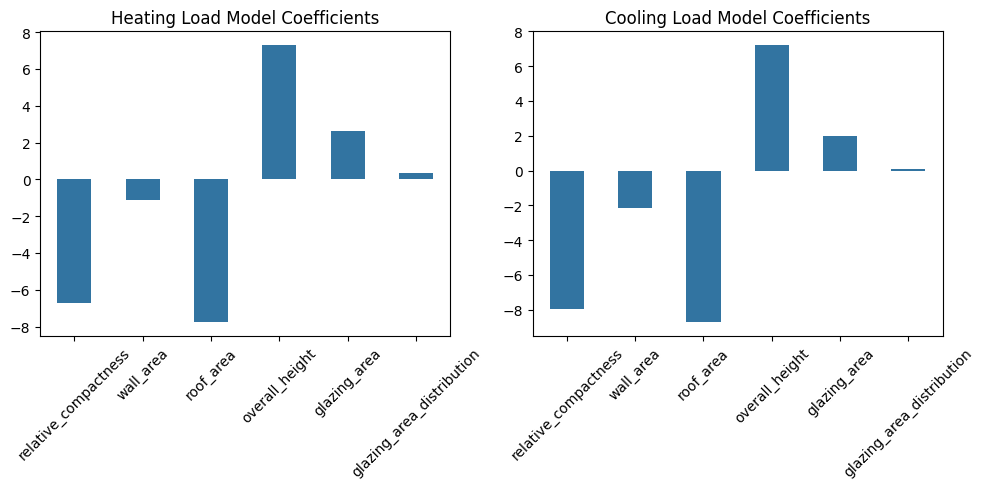

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=features, y=lr_heating.coef_, width=0.5, ax=axes[0])
axes[0].set_title('Heating Load Model Coefficients')
axes[0].set_xticklabels(labels=features, rotation=45)

sns.barplot(x=features, y=lr_cooling.coef_, width=0.5, ax=axes[1])
axes[1].set_title('Cooling Load Model Coefficients')
axes[1].set_xticklabels(labels=features, rotation=45)

plt.tight_layout()
plt.show()

# 7. Model selection

由於線性模型較簡單，有可能難以全面解釋資料間的關係，因此引入了額外 8 個回歸模型進行比較，我們可以觀察哪個模型表現較好。

Leave-One-Out Cross-Validation（簡稱 LOO CV），意思是每次從資料中拿出 1 筆資料作為驗證，其餘 767 筆作為訓練。

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import LeaveOneOut

只要模型內部有抽籤、抽樣、隨機起點，就加 random_state，以免每次結果不同。

In [ ]:
models = [LinearRegression(), Ridge(random_state=seed), Lasso(random_state=seed),
          DecisionTreeRegressor(random_state=seed), RandomForestRegressor(random_state=seed),
          GradientBoostingRegressor(random_state=seed), AdaBoostRegressor(random_state=seed),
          KNeighborsRegressor(), SVR()]

標準化輸入 X 資料

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

定義一個函式使用 LOO CV 來說明模型好壞

In [ ]:
def loo_results(model, X_scaled, y):

    loo = LeaveOneOut()
    test_array = np.array([])
    pred_array = np.array([])

    for train_index, test_index in loo.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_pred = model.fit(X_train, y_train).predict(X_test)
        test_array = np.append(test_array, y_test)
        pred_array = np.append(pred_array, y_pred)

    r2 = r2_score(test_array, pred_array)
    adjusted_r2 = (1 - (1-r2)*(len(test_array)-1)/(len(test_array)-X_scaled.shape[1]-1))
    mse = mean_squared_error(test_array, pred_array)
    rmse = np.sqrt(mean_squared_error(test_array, pred_array))
    mae = mean_absolute_error(test_array, pred_array)

    return adjusted_r2, mse, rmse, mae

In [ ]:
# create Dataframes to store the results
df_loo_heating = pd.DataFrame(columns=['Model_Heating', 'LOO_Adj_R2', 'LOO_MSE', 'LOO_RMSE', 'LOO_MAE'])
df_loo_cooling = pd.DataFrame(columns=['Model_Cooling', 'LOO_Adj_R2', 'LOO_MSE', 'LOO_RMSE', 'LOO_MAE'])

for model in models:
    adjuted_r2_heating, mse_heating, rmse_heating, mae_heating = loo_results(model, X_scaled, Y1)
    df_loo_heating = pd.concat([df_loo_heating,
                    pd.DataFrame([[model.__class__.__name__,
                    adjuted_r2_heating, mse_heating, mae_heating, rmse_heating]],
                    columns=['Model_Heating', 'LOO_Adj_R2', 'LOO_MSE', 'LOO_RMSE', 'LOO_MAE'])],
                    axis=0)
    adjuted_r2_cooling, mse_cooling, rmse_cooling, mae_cooling = loo_results(model, X_scaled, Y2)
    df_loo_cooling = pd.concat([df_loo_cooling,
                    pd.DataFrame([[model.__class__.__name__,
                    adjuted_r2_cooling, mse_cooling, mae_cooling, rmse_cooling]],
                    columns=['Model_Cooling', 'LOO_Adj_R2', 'LOO_MSE', 'LOO_RMSE', 'LOO_MAE'])],
                    axis=0)

<ipython-input-30-c72da1ded11c>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_loo_heating = pd.concat([df_loo_heating,
<ipython-input-30-c72da1ded11c>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_loo_cooling = pd.concat([df_loo_cooling,


照 adjusted R2 的大小順序排列

In [ ]:
# sort the results by adjusted R2
df_loo_heating = df_loo_heating.sort_values(by='LOO_Adj_R2', ascending=False).reset_index(drop=True)
df_loo_cooling = df_loo_cooling.sort_values(by='LOO_Adj_R2', ascending=False).reset_index(drop=True)

比較各個模型，y 為 adjusted R2

<ipython-input-32-f5acbcae96f1>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df_loo_heating['Model_Heating'], rotation=90)
<ipython-input-32-f5acbcae96f1>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(labels=df_loo_cooling['Model_Cooling'], rotation=90)


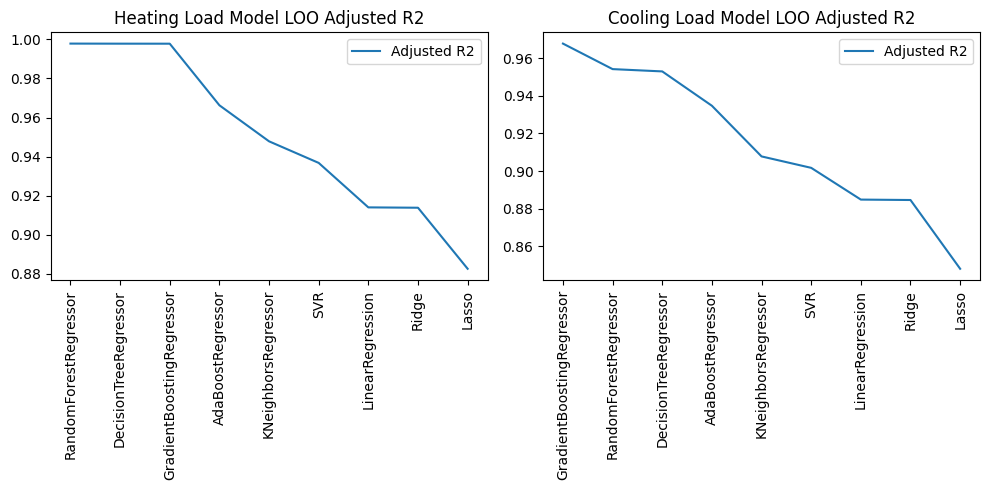

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(data=df_loo_heating, x='Model_Heating', y='LOO_Adj_R2', label='Adjusted R2', ax=ax[0])
ax[0].set_xticklabels(labels=df_loo_heating['Model_Heating'], rotation=90)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Heating Load Model LOO Adjusted R2')

sns.lineplot(data=df_loo_cooling, x='Model_Cooling', y='LOO_Adj_R2', label='Adjusted R2', ax=ax[1])
ax[1].set_xticklabels(labels=df_loo_cooling['Model_Cooling'], rotation=90)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('Cooling Load Model LOO Adjusted R2')

plt.tight_layout()
plt.show()

比較各個模型，y 變為 MSE、RMSE、MAE

<ipython-input-33-5077e2dbd3da>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df_loo_heating['Model_Heating'], rotation=90)
<ipython-input-33-5077e2dbd3da>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(labels=df_loo_cooling['Model_Cooling'], rotation=90)


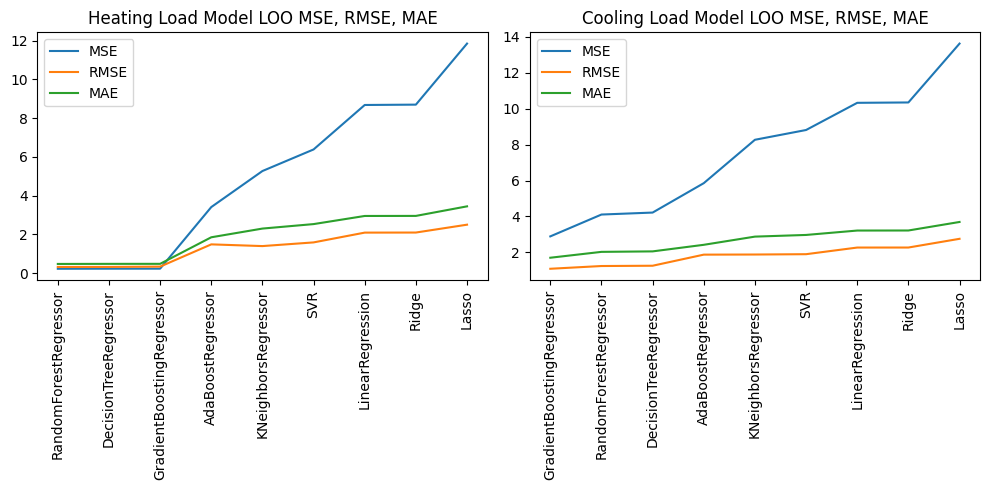

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(data=df_loo_heating, x='Model_Heating', y='LOO_MSE', label='MSE', ax=ax[0])
sns.lineplot(data=df_loo_heating, x='Model_Heating', y='LOO_RMSE', label='RMSE', ax=ax[0])
sns.lineplot(data=df_loo_heating, x='Model_Heating', y='LOO_MAE', label='MAE', ax=ax[0])
ax[0].set_xticklabels(labels=df_loo_heating['Model_Heating'], rotation=90)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Heating Load Model LOO MSE, RMSE, MAE')

sns.lineplot(data=df_loo_cooling, x='Model_Cooling', y='LOO_MSE', label='MSE', ax=ax[1])
sns.lineplot(data=df_loo_cooling, x='Model_Cooling', y='LOO_RMSE', label='RMSE', ax=ax[1])
sns.lineplot(data=df_loo_cooling, x='Model_Cooling', y='LOO_MAE', label='MAE', ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xticklabels(labels=df_loo_cooling['Model_Cooling'], rotation=90)
ax[1].set_title('Cooling Load Model LOO MSE, RMSE, MAE')

plt.tight_layout()
plt.show()

確認各項評估指標的結果

In [ ]:
print(df_loo_heating.round(4))
print('')
print(df_loo_cooling.round(4))

               Model_Heating  LOO_Adj_R2  LOO_MSE  LOO_RMSE  LOO_MAE
0      RandomForestRegressor      0.9978   0.2198    0.3131   0.4689
1      DecisionTreeRegressor      0.9978   0.2237    0.3153   0.4730
2  GradientBoostingRegressor      0.9978   0.2251    0.3316   0.4745
3          AdaBoostRegressor      0.9663   3.4036    1.4790   1.8449
4        KNeighborsRegressor      0.9478   5.2636    1.3906   2.2943
5                        SVR      0.9368   6.3775    1.5803   2.5254
6           LinearRegression      0.9140   8.6725    2.0855   2.9449
7                      Ridge      0.9139   8.6903    2.0896   2.9479
8                      Lasso      0.8826  11.8405    2.4951   3.4410

               Model_Cooling  LOO_Adj_R2  LOO_MSE  LOO_RMSE  LOO_MAE
0  GradientBoostingRegressor      0.9678   2.8890    1.0847   1.6997
1      RandomForestRegressor      0.9542   4.1064    1.2377   2.0264
2      DecisionTreeRegressor      0.9530   4.2161    1.2536   2.0533
3          AdaBoostRegressor     

可以發現，Gradient Boosting, Decision Tree, Random Forest 和 K-Nearest Neighbors 比起線性模型都具有更好的表現。

接下來要測試這四個模型，誰才是最終適合的模型。

In [ ]:
# split the data into training and testing sets
X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split(X, Y1, Y2, test_size=0.2, random_state=seed)

# scale the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

特別注意 Calculate RMSE using np.sqrt as 'squared' argument is not available in older versions，因此必須要改成 = np.sqrt(mse)。

In [ ]:
# define a function to evaluate the models using test data
def model_test(model, X_train, y_train, X_test, y_test):

    y_pred = model.fit(X_train, y_train).predict(X_test)

    # calculate the evaluation metrics
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = (1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    return adjusted_r2, mse, rmse, mae

In [ ]:
# define the models to be tested
models_test = [ DecisionTreeRegressor(random_state=seed), RandomForestRegressor(random_state=seed),
                GradientBoostingRegressor(random_state=seed), KNeighborsRegressor()]

In [ ]:
# create dataframes to store the evaluation metrics of models
df_heating_test = pd.DataFrame(columns=['Model_Heating', 'Test_Adj_R2', 'Test_MSE', 'Test_RMSE', 'Test_MAE'])
for model in models_test:
    adjusted_r2, mse, rmse, mae = model_test(model, X_train, Y1_train, X_test, Y1_test)
    df_heating_test = pd.concat([df_heating_test,
                    pd.DataFrame([[model.__class__.__name__, adjusted_r2, mse, rmse, mae]],
                    columns=['Model_Heating', 'Test_Adj_R2', 'Test_MSE', 'Test_RMSE', 'Test_MAE'])],
                    axis=0)
df_heating_test = df_heating_test.sort_values(by='Test_Adj_R2', ascending=False).reset_index(drop=True)


df_cooling_test = pd.DataFrame(columns=['Model_Cooling', 'Test_Adj_R2', 'Test_MSE', 'Test_RMSE', 'Test_MAE'])
for model in models_test:
    adjusted_r2, mse, rmse, mae = model_test(model, X_train, Y2_train, X_test, Y2_test)
    df_cooling_test = pd.concat([df_cooling_test,
                    pd.DataFrame([[model.__class__.__name__, adjusted_r2, mse, rmse, mae]],
                    columns=['Model_Cooling', 'Test_Adj_R2', 'Test_MSE', 'Test_RMSE', 'Test_MAE'])],
                    axis=0)
df_cooling_test = df_cooling_test.sort_values(by='Test_Adj_R2', ascending=False).reset_index(drop=True)

<ipython-input-42-d223dc0421ee>:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_heating_test = pd.concat([df_heating_test,
<ipython-input-42-d223dc0421ee>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_cooling_test = pd.concat([df_cooling_test,


<ipython-input-43-685c951f5d7f>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df_heating_test['Model_Heating'], rotation=45)
<ipython-input-43-685c951f5d7f>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(labels=df_cooling_test['Model_Cooling'], rotation=45)


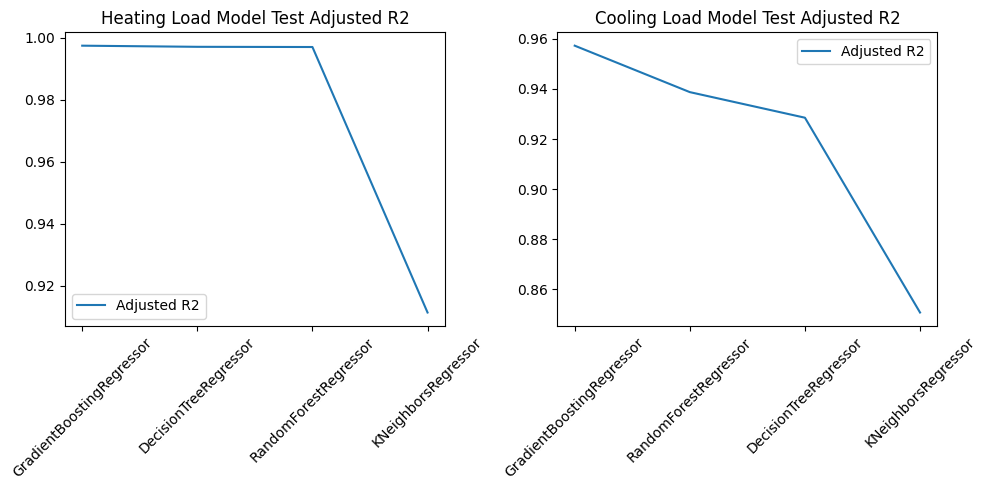

In [ ]:
# plot the results of test data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(data=df_heating_test, x='Model_Heating', y='Test_Adj_R2', label='Adjusted R2', ax=ax[0])
ax[0].set_xticklabels(labels=df_heating_test['Model_Heating'], rotation=45)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Heating Load Model Test Adjusted R2')

sns.lineplot(data=df_cooling_test, x='Model_Cooling', y='Test_Adj_R2', label='Adjusted R2', ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xticklabels(labels=df_cooling_test['Model_Cooling'], rotation=45)
ax[1].set_title('Cooling Load Model Test Adjusted R2')

plt.tight_layout()
plt.show()

<ipython-input-44-6ae28df4f980>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df_heating_test['Model_Heating'], rotation=45)
<ipython-input-44-6ae28df4f980>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(labels=df_cooling_test['Model_Cooling'], rotation=45)


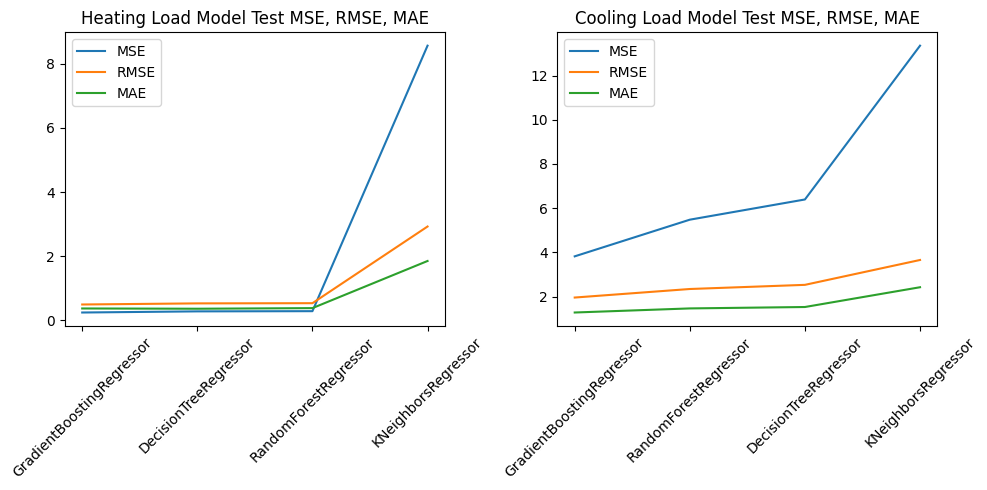

In [ ]:
# plot the results of test data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(data=df_heating_test, x='Model_Heating', y='Test_MSE', label='MSE', ax=ax[0])
sns.lineplot(data=df_heating_test, x='Model_Heating', y='Test_RMSE', label='RMSE', ax=ax[0])
sns.lineplot(data=df_heating_test, x='Model_Heating', y='Test_MAE', label='MAE', ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_xticklabels(labels=df_heating_test['Model_Heating'], rotation=45)
ax[0].set_title('Heating Load Model Test MSE, RMSE, MAE')

sns.lineplot(data=df_cooling_test, x='Model_Cooling', y='Test_MSE', label='MSE', ax=ax[1])
sns.lineplot(data=df_cooling_test, x='Model_Cooling', y='Test_RMSE', label='RMSE', ax=ax[1])
sns.lineplot(data=df_cooling_test, x='Model_Cooling', y='Test_MAE', label='MAE', ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xticklabels(labels=df_cooling_test['Model_Cooling'], rotation=45)
ax[1].set_title('Cooling Load Model Test MSE, RMSE, MAE')

plt.tight_layout()
plt.show()

In [ ]:
# check the results of test data
print(f'Heating load model test results: \n{df_heating_test.round(4)}')
print(' ')
print(f'Cooling load model test results: \n{df_cooling_test.round(4)}')

Heating load model test results: 
               Model_Heating  Test_Adj_R2  Test_MSE  Test_RMSE  Test_MAE
0  GradientBoostingRegressor       0.9975    0.2457     0.4957    0.3717
1      DecisionTreeRegressor       0.9971    0.2812     0.5303    0.3635
2      RandomForestRegressor       0.9970    0.2875     0.5362    0.3827
3        KNeighborsRegressor       0.9113    8.5640     2.9264    1.8517
 
Cooling load model test results: 
               Model_Cooling  Test_Adj_R2  Test_MSE  Test_RMSE  Test_MAE
0  GradientBoostingRegressor       0.9573    3.8189     1.9542    1.2767
1      RandomForestRegressor       0.9387    5.4787     2.3407    1.4620
2      DecisionTreeRegressor       0.9285    6.3933     2.5285    1.5257
3        KNeighborsRegressor       0.8507   13.3550     3.6545    2.4208


# 分析各特徵重要性

In [ ]:
print(f'Heating load average value: {np.mean(Y1).round(4)}')
print(f'Heating load model prediction error: {df_heating_test.iloc[0, -1].round(4)}')
print(f'error %: {(df_heating_test.iloc[0, -1]/np.mean(Y1)*100).round(4)}%')
print(' ')
print(f'Cooling load average value: {np.mean(Y2).round(4)}')
print(f'Cooling load model prediction error: {df_cooling_test.iloc[0, -1].round(4)}')
print(f'error %: {(df_cooling_test.iloc[0, -1]/np.mean(Y2)*100).round(4)}%')

Heating load average value: 22.3072
Heating load model prediction error: 0.3717
error %: 1.6662%
 
Cooling load average value: 24.5878
Cooling load model prediction error: 1.2767
error %: 5.1922%


挑選決策樹與隨機森林進行特徵重要性的分析
* 決策樹與隨機森林都屬於「不需太多特徵標準化」的模型，對於開發快速原型、建模實驗時非常有利。

* 特別是 DecisionTreeRegressor：速度快，能幫你快速判斷特徵與目標的非線性關係。

In [ ]:
# fit the models using the whole dataset
dt_heating = DecisionTreeRegressor(random_state=seed).fit(X, Y1)
rf_cooling = RandomForestRegressor(random_state=seed).fit(X, Y2)

# extract the feature importance
heating_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt_heating.feature_importances_})
cooling_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_cooling.feature_importances_})

# sort the feature importance in descending order
heating_feature_importance = heating_feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)
cooling_feature_importance = cooling_feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

<ipython-input-48-e5cedfa231d8>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=heating_feature_importance['Feature'], rotation=90)
<ipython-input-48-e5cedfa231d8>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(labels=cooling_feature_importance['Feature'], rotation=90)


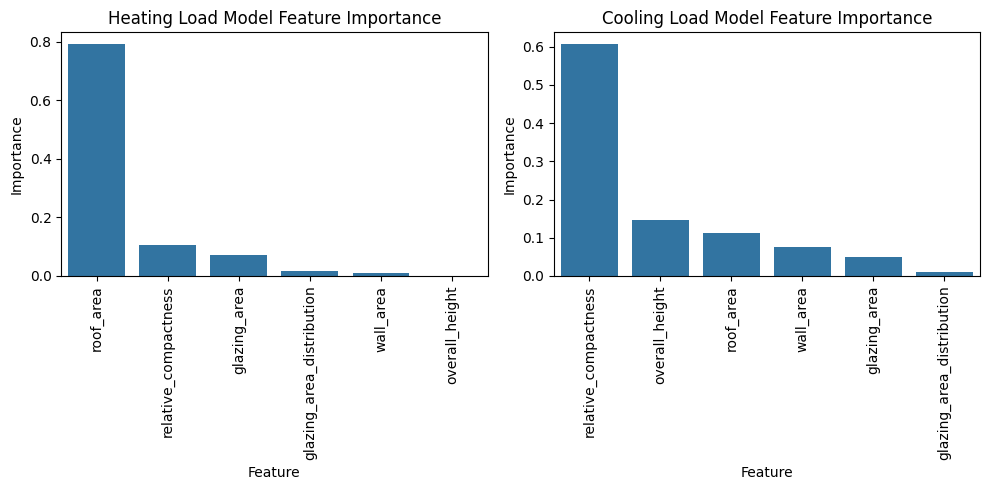

In [ ]:
# plot the feature importance
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(data=heating_feature_importance, x='Feature', y='Importance', ax=ax[0])
ax[0].set_xticklabels(labels=heating_feature_importance['Feature'], rotation=90)
ax[0].set_title('Heating Load Model Feature Importance')

sns.barplot(data=cooling_feature_importance, x='Feature', y='Importance', ax=ax[1])
ax[1].set_xticklabels(labels=cooling_feature_importance['Feature'], rotation=90)
ax[1].set_title('Cooling Load Model Feature Importance')

plt.tight_layout()
plt.show()

In [ ]:
# check the feature importance
print(f'Heating load predicting feature importance: \n{heating_feature_importance}')
print('')
print(f'Cooling load predicting feature importance: \n{cooling_feature_importance}')

Heating load predicting feature importance: 
                     Feature  Importance
0                  roof_area    0.793124
1       relative_compactness    0.106695
2               glazing_area    0.072992
3  glazing_area_distribution    0.016034
4                  wall_area    0.011156
5             overall_height    0.000000

Cooling load predicting feature importance: 
                     Feature  Importance
0       relative_compactness    0.607177
1             overall_height    0.147001
2                  roof_area    0.111177
3                  wall_area    0.076447
4               glazing_area    0.048655
5  glazing_area_distribution    0.009544
